# Importing Data from Eyelink EDF files Example

In [1]:
import sys, os
sys.path.insert(0,"..") # this is not needed if you have installed pypillometry
import pypillometry as pp
import pandas as pd
import numpy as np
import pylab as plt

The easiest way is to use a local filename or a URL where the EDF file is stored:

In [6]:
url='https://osf.io/trsuq/download' # will download the file from OSF
d = pp.EyeData.from_eyelink(url)
d

tmpfxwzpzg0: 100%|██████████| 14.2M/14.2M [00:01<00:00, 11.6MiB/s]
pp: 10:45:45 | INFO     | read_eyelink:582 | Loading EDF file: /tmp/tmpfxwzpzg0 (current log level: INFO, set to DEBUG to see eyelinkio output)


EyeData(tmpfxwzpzg0, 61.1MiB):
 n                   : 598885
 sampling_rate       : 500.0
 data                : ['left_x', 'left_y', 'left_pupil', 'right_x', 'right_y', 'right_pupil']
 nevents             : 1685
 screen_limits       : ((0, 1280), (0, 1024))
 physical_screen_size: not set
 screen_eye_distance : not set
 duration_minutes    : 19.962833333333336
 start_min           : 0.0
 end_min             : 19.9628
 parameters          : {}
 glimpse             : EyeDataDict(vars=6,n=598885,shape=(598885,)): 
  left_x (float64): 668.2000122070312, 660.5999755859375, 650.0, 639.0999755859375, 628.4000244140625...
  left_y (float64): 491.1000061035156, 490.1000061035156, 489.3999938964844, 488.5, 488.0...
  left_pupil (float64): 724.0, 724.0, 725.0, 727.0, 727.0...
  right_x (float64): 682.7999877929688, 679.5, 674.5, 662.7000122070312, 644.2999877929688...
  right_y (float64): 505.20001220703125, 502.8999938964844, 501.29998779296875, 499.0, 496.3999938964844...
  right_pupil (float64

You can also cache a local copy of the file to avoid further downloads. The following command will download the file only the first time and read it from the local file the second time it is run:

In [4]:
d=pp.EyeData.from_eyelink(url, cache_file="example_data/test.edf")

pp: 10:43:39 | INFO     | read_eyelink:582 | Loading EDF file: example_data/test.edf (current log level: INFO, set to DEBUG to see eyelinkio output)


This works for publicly shared EDF files such as the one under the link <https://osf.io/trsuq/download>. If you want to load data from a private OSF repository, you will need to authenticate first. To do that, create a "Personal access token" on your OSF page under <https://osf.io/settings/tokens>. 

Copy that token and store it in a variable or a protected file (CAUTION: if you share that token, they will be able to access your private OSF data). Here, I stored my token in a file "my_osf_token.secret" so that the token is not revealed in the documentation:

In [2]:
private_url = "https://osf.io/5vkj3/download"

# read the token from the file
with open("my_osf_token.secret") as f:
    token = f.read().strip()

# use the token to authenticate to OSF
session = pp.osf_authenticate(token, validate=True)
d = pp.EyeData.from_eyelink(private_url, session=session)

pp: 10:47:38 | INFO     | osf_authenticate:81 | OSF token validation succeeded.
tmpml4svjq1: 100%|██████████| 43.9M/43.9M [00:05<00:00, 8.24MiB/s]
pp: 10:47:46 | INFO     | read_eyelink:582 | Loading EDF file: /tmp/tmpml4svjq1 (current log level: INFO, set to DEBUG to see eyelinkio output)
pp: 10:48:20 | INFO     | from_eyelink:682 | Filtering out Eyelink triggers


The result is an `EyeData` object containing all the data and samples.

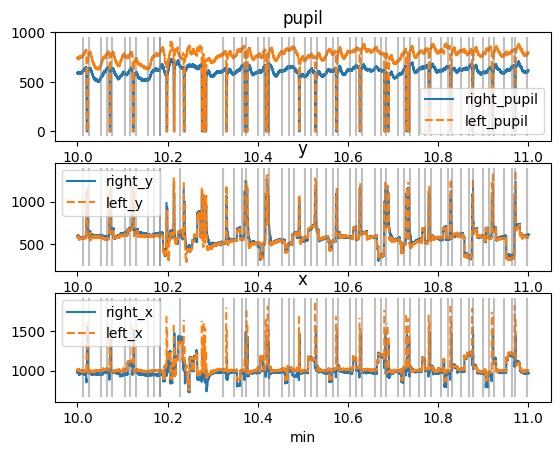

In [ ]:
# plot the timeseries for a minute of data (min 10-11)
d.plot_timeseries( (10, 11), units="min")

Note: The `EyeData.from_eyelink()` function removes Eyelink's triggers related to calibration and validation. If you want those, you can use keyword arguments

- `remove_eyelink_triggers=False` to keep those
- `return_edf_obj=True` to return the original `eyelinkio` object that contains all information (including saccade detection etc)

In [8]:
d,edfobj = pp.EyeData.from_eyelink(private_url, session=session, return_edf_obj=True)
edfobj

tmpr8bngegk: 100%|██████████| 43.9M/43.9M [00:03<00:00, 14.0MiB/s]
pp: 10:53:42 | INFO     | read_eyelink:582 | Loading EDF file: /tmp/tmpr8bngegk (current log level: INFO, set to DEBUG to see eyelinkio output)
pp: 10:54:17 | INFO     | from_eyelink:682 | Filtering out Eyelink triggers


<EDF | tmpr8bngegk> 
  Version: EYELINK II 1 
  Eye: BINOCULAR 
  Pupil unit: PUPIL_AREA 
  Sampling frequency: 1000.0 Hz 
  Calibrations: 4 
  Length: 1905.643 seconds 

In [10]:
edfobj["discrete"]

{'messages': array([(   0.   , b'!CAL \n>>>>>>> CALIBRATION (HV9,P-CR) FOR LEFT: <<<<<<<<<'),
        (   0.   , b'!CAL Calibration points:  '),
        (   0.   , b'!CAL -15.8, -58.2         0,    264   '), ...,
        (1875.54 , b'TRIG_TASK_END_253'),
        (1905.633, b'TRIG_SESSION_END_249'), (1905.642, b'RECORDING_STOP')],
       dtype=[('stime', '<f8'), ('msg', 'S260')]),
 'buttons': array([(0., 0.), (0., 0.), (0., 0.), (0., 0.)],
       dtype=[('stime', '<f8'), ('buttons', '<f8')]),
 'inputs': array([(0., 0.), (0., 0.), (0., 0.), (0., 0.)],
       dtype=[('stime', '<f8'), ('input', '<f8')]),
 'fixations': array([(0., 7.000000e-03, 2.590000e-01,  971.09997559, 628.5       ),
        (1., 1.000000e-02, 2.590000e-01,  986.29998779, 627.59997559),
        (1., 3.190000e-01, 4.480000e-01,  644.40002441, 532.20001221), ...,
        (1., 1.905359e+03, 1.905453e+03, 1068.19995117, 514.79998779),
        (0., 1.905515e+03, 1.905641e+03,  853.5       , 488.5       ),
        (1., 1.9055